#📌 Extracão

In [2]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url ='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

## Verificando Inconsistências nos Dados

In [3]:
dados = requests.get(url)
resultado = json.loads(dados.text)

dados = pd.json_normalize(resultado, sep='/')
dados.head()

,customerID,Churn,customer/gender,customer/SeniorCitizen,customer/Partner,customer/Dependents,customer/tenure,phone/PhoneService,phone/MultipleLines,internet/InternetService,...,internet/OnlineBackup,internet/DeviceProtection,internet/TechSupport,internet/StreamingTV,internet/StreamingMovies,account/Contract,account/PaperlessBilling,account/PaymentMethod,account/Charges/Monthly,account/Charges/Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer/gender            7267 non-null   object 
 3   customer/SeniorCitizen     7267 non-null   int64  
 4   customer/Partner           7267 non-null   object 
 5   customer/Dependents        7267 non-null   object 
 6   customer/tenure            7267 non-null   int64  
 7   phone/PhoneService         7267 non-null   object 
 8   phone/MultipleLines        7267 non-null   object 
 9   internet/InternetService   7267 non-null   object 
 10  internet/OnlineSecurity    7267 non-null   object 
 11  internet/OnlineBackup      7267 non-null   object 
 12  internet/DeviceProtection  7267 non-null   object 
 13  internet/TechSupport       7267 non-null   objec

In [5]:
print("Valores ausentes por coluna:")
print(dados.isnull().sum(), "\n")

Valores ausentes por coluna:
customerID                   0
Churn                        0
customer/gender              0
customer/SeniorCitizen       0
customer/Partner             0
customer/Dependents          0
customer/tenure              0
phone/PhoneService           0
phone/MultipleLines          0
internet/InternetService     0
internet/OnlineSecurity      0
internet/OnlineBackup        0
internet/DeviceProtection    0
internet/TechSupport         0
internet/StreamingTV         0
internet/StreamingMovies     0
account/Contract             0
account/PaperlessBilling     0
account/PaymentMethod        0
account/Charges/Monthly      0
account/Charges/Total        0
dtype: int64 



In [6]:
print(f"Total de linhas duplicadas: {dados.duplicated().sum()}")
if dados.duplicated().sum() > 0:
  print("Linhas duplicadas detectadas:\n", dados[dados.duplicated()], "\n")

Total de linhas duplicadas: 0


In [7]:
for col in dados.select_dtypes(include='object').columns:
        dados[col] = dados[col].str.strip().str.title()

In [8]:
for col in dados.select_dtypes(include='datetime').columns:
        dados[col] = dados[col].dt.normalize()

In [9]:
print("Categorias únicas após normalização:")
for col in dados.select_dtypes(include=['object']).columns:
  print(f"{col}: {pd.unique(dados[col])}")
print()


Categorias únicas após normalização:
customerID: ['0002-Orfbo' '0003-Mknfe' '0004-Tlhlj' ... '9992-Ujoel' '9993-Lhieb'
 '9995-Hotoh']
Churn: ['No' 'Yes' '']
customer/gender: ['Female' 'Male']
customer/Partner: ['Yes' 'No']
customer/Dependents: ['Yes' 'No']
phone/PhoneService: ['Yes' 'No']
phone/MultipleLines: ['No' 'Yes' 'No Phone Service']
internet/InternetService: ['Dsl' 'Fiber Optic' 'No']
internet/OnlineSecurity: ['No' 'Yes' 'No Internet Service']
internet/OnlineBackup: ['Yes' 'No' 'No Internet Service']
internet/DeviceProtection: ['No' 'Yes' 'No Internet Service']
internet/TechSupport: ['Yes' 'No' 'No Internet Service']
internet/StreamingTV: ['Yes' 'No' 'No Internet Service']
internet/StreamingMovies: ['No' 'Yes' 'No Internet Service']
account/Contract: ['One Year' 'Month-To-Month' 'Two Year']
account/PaperlessBilling: ['Yes' 'No']
account/PaymentMethod: ['Mailed Check' 'Electronic Check' 'Credit Card (Automatic)'
 'Bank Transfer (Automatic)']
account/Charges/Total: ['593.3' '542.

In [10]:
print("Frequência de categorias:")
for col in dados.select_dtypes(include=['object']).columns:
        print(f"\n{col}:")
        print(dados[col].value_counts())

Frequência de categorias:

customerID:
customerID
9995-Hotoh    1
0002-Orfbo    1
0003-Mknfe    1
9970-Qbcda    1
9968-Ffvvh    1
             ..
0014-Bmaqu    1
0013-Smeoe    1
0013-Mhzwf    1
0013-Exchz    1
0011-Igkff    1
Name: count, Length: 7267, dtype: int64

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

customer/gender:
customer/gender
Male      3675
Female    3592
Name: count, dtype: int64

customer/Partner:
customer/Partner
No     3749
Yes    3518
Name: count, dtype: int64

customer/Dependents:
customer/Dependents
No     5086
Yes    2181
Name: count, dtype: int64

phone/PhoneService:
phone/PhoneService
Yes    6560
No      707
Name: count, dtype: int64

phone/MultipleLines:
phone/MultipleLines
No                  3495
Yes                 3065
No Phone Service     707
Name: count, dtype: int64

internet/InternetService:
internet/InternetService
Fiber Optic    3198
Dsl            2488
No             1581
Name: count, dtype: int64

internet/OnlineSec

In [11]:
print("\nDataFrame após normalizações:")
print(dados.head())


DataFrame após normalizações:
   customerID Churn customer/gender  customer/SeniorCitizen customer/Partner  \
0  0002-Orfbo    No          Female                       0              Yes   
1  0003-Mknfe    No            Male                       0               No   
2  0004-Tlhlj   Yes            Male                       0               No   
3  0011-Igkff   Yes            Male                       1              Yes   
4  0013-Exchz   Yes          Female                       1              Yes   

  customer/Dependents  customer/tenure phone/PhoneService phone/MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

 

In [12]:
dados.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer/gender,0
customer/SeniorCitizen,0
customer/Partner,0
customer/Dependents,0
customer/tenure,0
phone/PhoneService,0
phone/MultipleLines,0
internet/InternetService,0


## Tratando as Inconsistências

In [13]:
dados.columns = dados.columns.str.lower().str.replace(' ', '_')
dados.head()

,customerid,churn,customer/gender,customer/seniorcitizen,customer/partner,customer/dependents,customer/tenure,phone/phoneservice,phone/multiplelines,internet/internetservice,...,internet/onlinebackup,internet/deviceprotection,internet/techsupport,internet/streamingtv,internet/streamingmovies,account/contract,account/paperlessbilling,account/paymentmethod,account/charges/monthly,account/charges/total
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.6,593.3
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.9,542.4
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.9,280.85
3,0011-Igkff,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.0,1237.85
4,0013-Exchz,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.9,267.4


In [14]:
churn_desconhecido = dados.query('churn == ""')
churn_desconhecido.head()

,customerid,churn,customer/gender,customer/seniorcitizen,customer/partner,customer/dependents,customer/tenure,phone/phoneservice,phone/multiplelines,internet/internetservice,...,internet/onlinebackup,internet/deviceprotection,internet/techsupport,internet/streamingtv,internet/streamingmovies,account/contract,account/paperlessbilling,account/paymentmethod,account/charges/monthly,account/charges/total
30,0047-Zhdtw,,Female,0,No,No,11,Yes,Yes,Fiber Optic,...,No,No,No,No,No,Month-To-Month,Yes,Bank Transfer (Automatic),79.00,929.3
75,0120-Yzlqa,,Male,0,No,No,71,Yes,No,No,...,No Internet Service,No Internet Service,No Internet Service,No Internet Service,No Internet Service,Two Year,Yes,Credit Card (Automatic),19.90,1355.1
96,0154-Qyhju,,Male,0,No,No,29,Yes,No,Dsl,...,Yes,No,Yes,No,No,One Year,Yes,Electronic Check,58.75,1696.2
98,0162-Rzgmz,,Female,1,No,No,5,Yes,No,Dsl,...,Yes,No,Yes,No,No,Month-To-Month,No,Credit Card (Automatic),59.90,287.85
175,0274-Vvqoq,,Male,1,Yes,No,65,Yes,Yes,Fiber Optic,...,Yes,Yes,No,Yes,Yes,One Year,Yes,Bank Transfer (Automatic),103.15,6792.45


In [15]:
churn_desconhecido.tail()

,customerid,churn,customer/gender,customer/seniorcitizen,customer/partner,customer/dependents,customer/tenure,phone/phoneservice,phone/multiplelines,internet/internetservice,...,internet/onlinebackup,internet/deviceprotection,internet/techsupport,internet/streamingtv,internet/streamingmovies,account/contract,account/paperlessbilling,account/paymentmethod,account/charges/monthly,account/charges/total
7158,9840-Gsrfx,,Female,0,No,No,14,Yes,Yes,Dsl,...,Yes,No,No,No,No,One Year,Yes,Mailed Check,54.25,773.2
7180,9872-Rzqqb,,Female,0,Yes,No,49,No,No Phone Service,Dsl,...,No,No,No,Yes,No,Month-To-Month,No,Bank Transfer (Automatic),40.65,2070.75
7211,9920-Gndmb,,Male,0,No,No,9,Yes,Yes,Fiber Optic,...,No,No,No,No,No,Month-To-Month,Yes,Electronic Check,76.25,684.85
7239,9955-Rvwsc,,Female,0,Yes,Yes,67,Yes,No,No,...,No Internet Service,No Internet Service,No Internet Service,No Internet Service,No Internet Service,Two Year,Yes,Bank Transfer (Automatic),19.25,1372.9
7247,9966-Vyrtz,,Female,0,Yes,Yes,31,Yes,No,No,...,No Internet Service,No Internet Service,No Internet Service,No Internet Service,No Internet Service,Month-To-Month,Yes,Mailed Check,19.55,658.95


In [16]:
dados = dados[dados['churn'].str.strip() != '']

In [17]:
dados.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerid,0
churn,0
customer/gender,0
customer/seniorcitizen,0
customer/partner,0
customer/dependents,0
customer/tenure,0
phone/phoneservice,0
phone/multiplelines,0
internet/internetservice,0


In [18]:
dados

,customerid,churn,customer/gender,customer/seniorcitizen,customer/partner,customer/dependents,customer/tenure,phone/phoneservice,phone/multiplelines,internet/internetservice,...,internet/onlinebackup,internet/deviceprotection,internet/techsupport,internet/streamingtv,internet/streamingmovies,account/contract,account/paperlessbilling,account/paymentmethod,account/charges/monthly,account/charges/total
0,0002-Orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,Yes,No,Yes,Yes,No,One Year,Yes,Mailed Check,65.60,593.3
1,0003-Mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,No,Yes,Month-To-Month,No,Mailed Check,59.90,542.4
2,0004-Tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber Optic,...,No,Yes,No,No,No,Month-To-Month,Yes,Electronic Check,73.90,280.85
3,0011-Igkff,Yes,Male,1,Yes,No,13,Yes,No,Fiber Optic,...,Yes,Yes,No,Yes,Yes,Month-To-Month,Yes,Electronic Check,98.00,1237.85
4,0013-Exchz,Yes,Female,1,Yes,No,3,Yes,No,Fiber Optic,...,No,No,Yes,Yes,No,Month-To-Month,Yes,Mailed Check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-Lutyd,No,Female,0,No,No,13,Yes,No,Dsl,...,No,No,Yes,No,No,One Year,No,Mailed Check,55.15,742.9
7263,9992-Rramn,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber Optic,...,No,No,No,No,Yes,Month-To-Month,Yes,Electronic Check,85.10,1873.7
7264,9992-Ujoel,No,Male,0,No,No,2,Yes,No,Dsl,...,Yes,No,No,No,No,Month-To-Month,Yes,Mailed Check,50.30,92.75
7265,9993-Lhieb,No,Male,0,Yes,Yes,67,Yes,No,Dsl,...,No,Yes,Yes,No,Yes,Two Year,No,Mailed Check,67.85,4627.65


In [19]:
dados = dados.drop(['CUSTOMERID'], axis=1)

KeyError: "['CUSTOMERID'] not found in axis"

In [ ]:
dados.reset_index(drop=True, inplace=True)

In [ ]:
substituicoes = {
    'Male': 'masculino',
    'Female': 'feminino',
    'Month-to-month': 'mensal',
    'One year': 'anual',
    'Two year': 'bienal',
    'Fiber optic': 'fibra óptica',
    'Mailed check': 'cheque',
    'Electronic check': 'cheque eletrônico',
    'Credit card (automatic)': 'cartão de crédito automático',
    'Bank transfer (automatic)': 'transferência bancária automática',
    'No phone service': 'sem serviço telefônico',
    'No internet service': 'sem serviço de internet'
}

dados.replace(substituicoes, inplace=True)
dados.head()


## Padronização e Transformação de Dados

In [ ]:
dados.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelamento',
    'customer/gender': 'Gênero',
    'customer/seniorcitizen': 'Idoso',
    'customer/partner': 'Possui_Companheiro',
    'customer/dependents': 'Possui_Dependentes',
    'customer/tenure': 'Meses_de_Contrato',
    'phone/phoneservice': 'Telefone_Ativo',
    'phone/multiplelines': 'Multiplas_Linhas',
    'internet/internetservice': 'Tipo_Internet',
    'internet/onlinesecurity': 'Seguranca_Online',
    'internet/onlinebackup': 'Backup_Online',
    'internet/deviceprotection': 'Protecao_Dispositivo',
    'internet/techsupport': 'Suporte_Tecnico',
    'internet/streamingtV': 'Streaming_TV',
    'internet/streamingmovies': 'Streaming_Filmes',
    'account/contract': 'Tipo_Contrato',
    'account/paperlessbilling': 'Fatura_Digital',
    'account/paymentmethod': 'Forma_Pagamento',
    'account/charges/monthly': 'Valor_Mensal',
    'account/charges/total': 'Valor_Total',
    'tempo_estimado_meses': 'Meses_Estimados',
    'Conta_Diarias': 'Conta_Diaria'
}, inplace=True)

dados.head()


Trocar sim para 1 e não para 0

In [ ]:
mapa_binario = {'yes': 1, 'no': 0}
dados = dados.replace(mapa_binario)

In [ ]:
for col in dados.select_dtypes(include='object'):
    dados[col] = dados[col].str.strip().str.lower()
dados.head()

#📊 Carga e análise

In [ ]:

dados.describe()

In [ ]:
cores = ['#1f77b4', '#ff7f0e']

In [ ]:
import plotly.graph_objects as go

contagem_churn = dados['churn'].value_counts()

fig = go.Figure(data=[go.Pie(
    labels=['Não', 'Sim'],
    values=contagem_churn.values,
    pull=[0.1, 0],
    marker=dict(colors=cores),
    hoverinfo='label+value+percent',
    textinfo='percent'
)])

fig.update_layout(
    title='Distribuição da taxa de cancelamento na empresa TelecomX',
                  width=800,
                  height=800)
fig.show()


In [ ]:
from matplotlib.ticker import MultipleLocator
from matplotlib import figure

In [ ]:
contagem = dados['Meses_de_Contrato'].value_counts().sort_index()
bins = list(range(0, contagem.index.max() + 5, 5))
labels_contrato = [f"{i+1}-{i+5}" for i in bins[:-1]]

contagem_df = contagem.reset_index()
contagem_df.columns = ['meses', 'quantidade']
contagem_df['faixa'] = pd.cut(contagem_df['meses'], bins=bins, labels=labels_contrato)
agrupado = contagem_df.groupby('faixa')['quantidade'].sum()

In [ ]:
valor = dados['Valor_Mensal'].value_counts().sort_index()

max_valor = valor.index.max()
bins_valor = np.arange(0, max_valor + 5, 5)
labels_valor= [f"{int(bins_valor[i]+0.1)}-{int(bins_valor[i+1])}"
               for i in range(len(bins_valor)-1)]

valor = valor.reset_index()
valor.columns = ['meses', 'quantidade']
valor['faixa'] = pd.cut(valor['meses'], bins=bins_valor, labels=labels_valor,
                        right=True, include_lowest=True)
agrupado_valor = valor.groupby('faixa')['quantidade'].sum()
agrupado_valor.head()

In [ ]:
dados['churn'] = dados['churn'].replace({
    'Yes': 'Sim',
    'No': 'Não',
    '': 'Não informado'
})

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

dados['Idoso_str'] = dados['Idoso'].map({0: 'Não', 1: 'Sim'})
dados['Possui_Companheiro_str'] = dados['Possui_Companheiro'].map({0: 'Não', 1: 'Sim'})
dados['Possui_Dependentes_str'] = dados['Possui_Dependentes'].map({0: 'Não', 1: 'Sim'})
dados['Gênero_str'] = dados['Gênero'].str.capitalize()
agrupado = dados['Meses_de_Contrato'].value_counts().sort_index()

fig = make_subplots(rows=2, cols=5, subplot_titles=[
    'Gênero', 'Idoso', 'Possui Companheiro', 'Possui Dependentes', 'Meses de Contrato',
    'Telefone Ativo', 'Multiplas Linhas', 'Tipo Internet', 'Seguranca Online', 'Backup Online'
])

fig.add_trace(go.Bar(
    x=['Feminino', 'Masculino'],
    y=dados['Gênero_str'].value_counts().reindex(['Feminino', 'Masculino'], fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=1, col=1)

fig.add_trace(go.Bar(
    x=['Não', 'Sim'],
    y=dados['Idoso_str'].value_counts().reindex(['Não', 'Sim'], fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=1, col=2)

fig.add_trace(go.Bar(
    x=['Não', 'Sim'],
    y=dados['Possui_Companheiro_str'].value_counts().reindex(['Não', 'Sim'],
                                                             fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=1, col=3)

fig.add_trace(go.Bar(
    x=['Não', 'Sim'],
    y=dados['Possui_Dependentes_str'].value_counts().reindex(['Não', 'Sim'],
                                                             fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=1, col=4)

fig.add_trace(go.Bar(
    x=agrupado.index.astype(str),
    y=agrupado.values,
    marker_color='#67C9E0'), row=1, col=5)

fig.add_trace(go.Bar(
    x=['Não', 'Sim', 'Sem serviço telefônico'],
    y=dados['Telefone_Ativo'].value_counts().reindex(['Não', 'Sim', 'Sem serviço telefônico'],
                                                     fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=2, col=1)

fig.add_trace(go.Bar(
    x=['Não', 'Sim', 'Sem serviço telefônico'],
    y=dados['Multiplas_Linhas'].value_counts().reindex(['Não', 'Sim', 'Sem serviço telefônico'],
                                                       fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=2, col=2)

fig.add_trace(go.Bar(
    x=['Não', 'Sim', 'Sem serviço de internet'],
    y=dados['Tipo_Internet'].value_counts().reindex(['Não', 'Sim', 'Sem serviço de internet'],
                                                    fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=2, col=3)

fig.add_trace(go.Bar(
    x=['Não', 'Sim', 'Sem serviço de internet'],
    y=dados['Seguranca_Online'].value_counts().reindex(['Não', 'Sim', 'Sem serviço de internet'],
                                                       fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=2, col=4)

fig.add_trace(go.Bar(
    x=['Não', 'Sim', 'Sem serviço de internet'],
    y=dados['Backup_Online'].value_counts().reindex(['Não', 'Sim', 'Sem serviço de internet'],
                                                    fill_value=0),
    marker_color='#67C9E0',
    width=0.4), row=2, col=5)

fig.update_layout(
    title='Distribuição de clientes por categoria na empresa TelecomX - Geral',
    width=1400,
    height=700,
    font_family='Arial',
    title_font_color='black',
    title_font_size=16,
    font_size=12,
    showlegend=False
)

fig.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis_categoricas = [
    'Gênero',
    'Idoso',
    'Possui_Companheiro',
    'Possui_Dependentes'
]

paleta_churn = {
    'No': '#b2df8a',
    'Yes': '#fcbfdc',
    'Não informado': '#a1c9f4'
}

dados['churn'] = dados['churn'].replace({
    'Yes': 'Sim',
    'No': 'Não',
    None: 'Não informado',
    pd.NA: 'Não informado',
    float('nan'): 'Não informado'
})

dados['churn'] = dados['churn'].fillna('Não informado')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, coluna in enumerate(variaveis_categoricas):
    sns.countplot(data=dados, x=coluna, hue='churn', palette=paleta_churn, ax=axes[i])
    axes[i].set_title(f'Evasão por {coluna}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Número de Clientes')
    axes[i].tick_params(axis='x', rotation=15)
    axes[i].legend(title='Evasão')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dados['churn_filled'] = dados['churn'].fillna('Não informado')

paleta = {
    'Sim': '#fcbfdc',
    'Não': '#b2df8a',
    'Não informado': '#a1c9f4'
}

variaveis_numericas = ['Valor_Mensal', 'Valor_Total', 'Meses_de_Contrato']

n = len(variaveis_numericas)
ncols = 2
nrows = (n + 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 4 * nrows))
axes = axes.flatten()

for i, var in enumerate(variaveis_numericas):
    sns.histplot(
        data=dados,
        x=var,
        hue='churn_filled',
        multiple='stack',
        palette=paleta,
        bins=30,
        edgecolor='lightgray',
        linewidth=0.3,
        ax=axes[i]
    )
    axes[i].set_title(f'Histograma de {var.replace("_", " ")} por Cancelamento', fontsize=11)
    axes[i].set_xlabel(var.replace('_', ' '))
    axes[i].set_ylabel('Frequência')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(h_pad=3.0)
plt.show()


In [24]:
print(dados.columns.tolist())  # Lista todas as colunas do DataFrame

['customerid', 'churn', 'customer/gender', 'customer/seniorcitizen', 'customer/partner', 'customer/dependents', 'customer/tenure', 'phone/phoneservice', 'phone/multiplelines', 'internet/internetservice', 'internet/onlinesecurity', 'internet/onlinebackup', 'internet/deviceprotection', 'internet/techsupport', 'internet/streamingtv', 'internet/streamingmovies', 'account/contract', 'account/paperlessbilling', 'account/paymentmethod', 'account/charges/monthly', 'account/charges/total']


Extra

In [20]:
palette = 'mako'

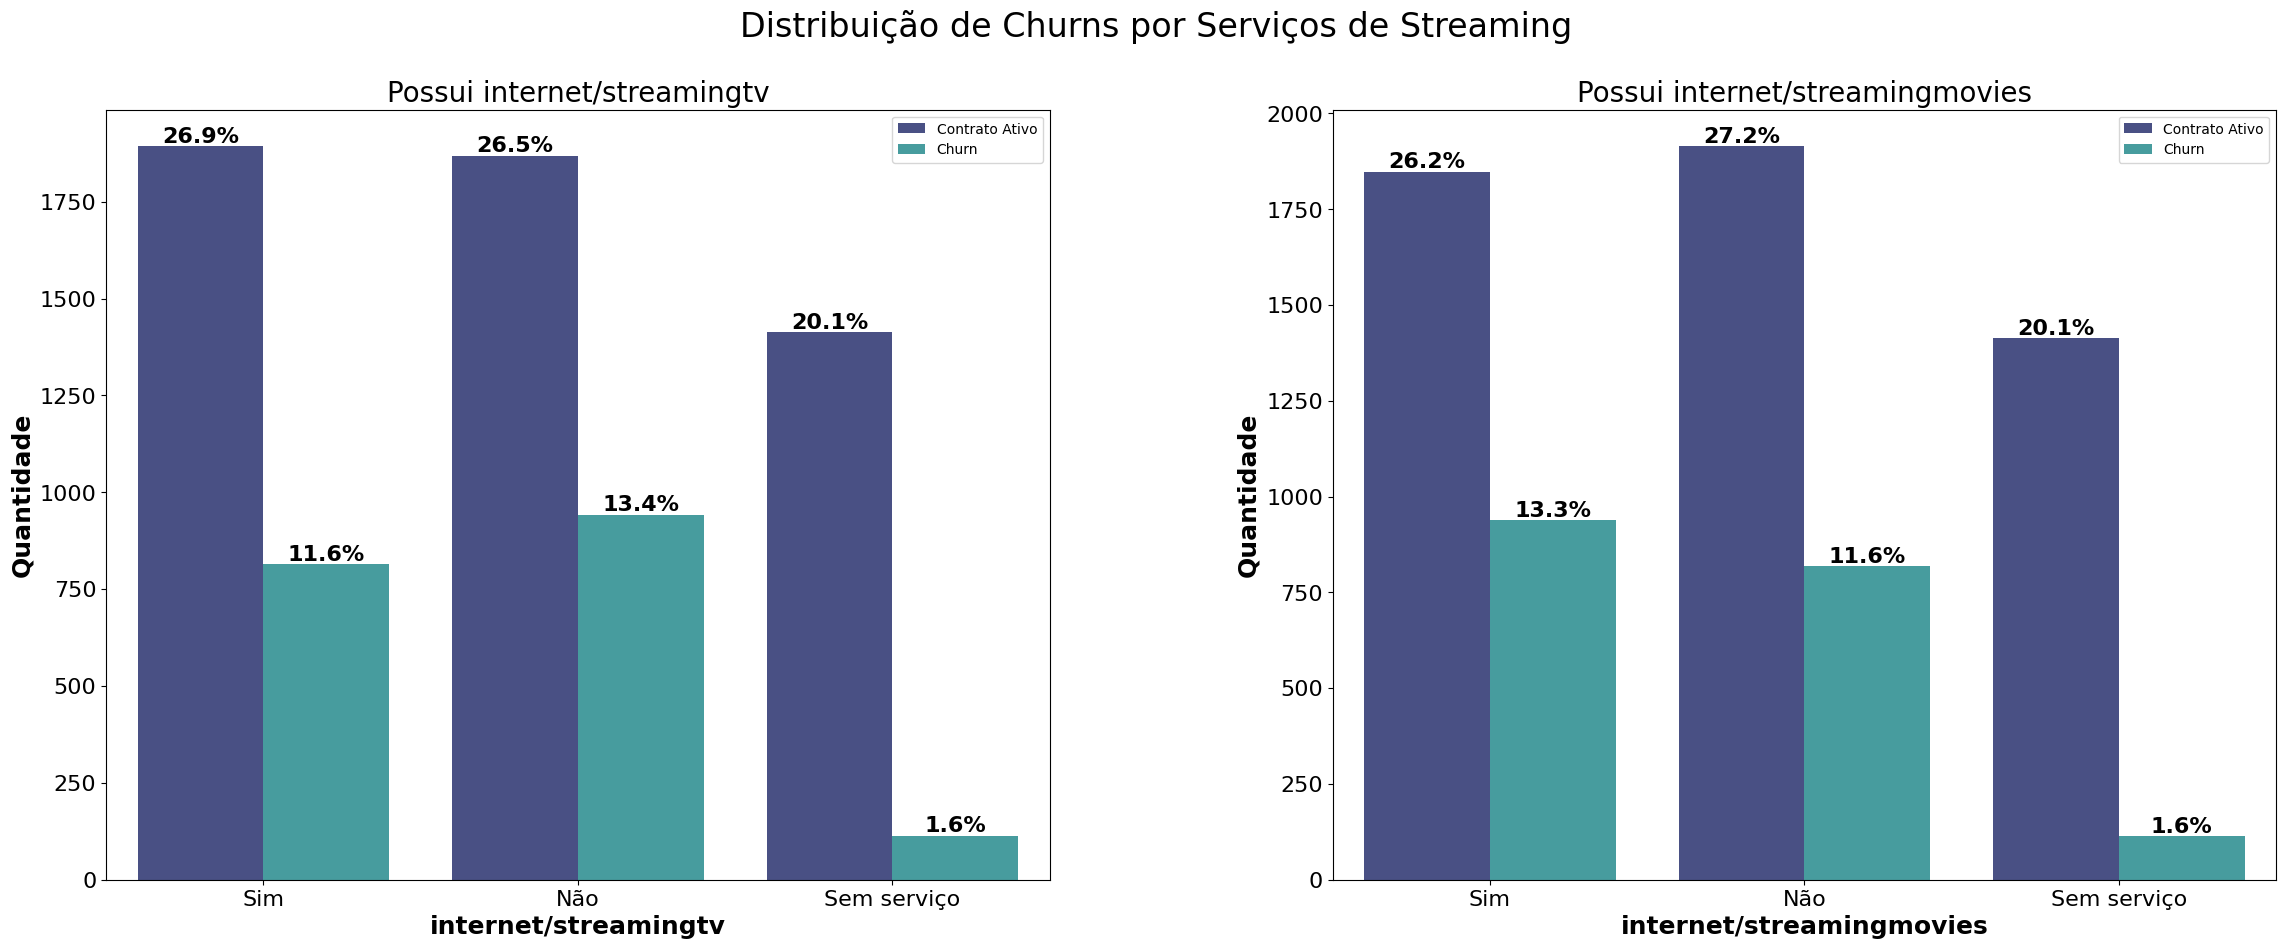

In [27]:
columns = ['internet/streamingtv', 'internet/streamingmovies']

fig, axs = plt.subplots(1, 2, figsize=(28,10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

fig.suptitle('Distribuição de Churns por Serviços de Streaming',
             fontsize=24, color='black')

for i, ax in enumerate(axs.flatten()):
  sns.countplot(data=dados, x=columns[i], hue='churn',
                palette=palette, ax=ax)
  ax.set_xticks([0, 1, 2])
  ax.set_xticklabels(['Sim', 'Não', 'Sem serviço'])

  ax.set_xlabel(columns[i], fontsize=18, fontweight='bold')
  ax.set_ylabel('Quantidade', fontsize=18, fontweight='bold')
  ax.set_title(f'Possui {columns[i]}', fontsize=20, color='black')
  ax.tick_params(axis='both', labelsize=16)
  ax.legend(labels=['Contrato Ativo', 'Churn'])

  for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    if y != 0:
      ax.text(x, y, f'{100*y/len(dados):.1f}%', ha='center',
              va='bottom', fontweight='bold', fontsize=16)


#📄Relatorio Final

## Telecom X

Atualmente a Telecom X enfrenta um alto índice de cancelamentos de clientes. Para entender e evitar os cancelamentos, é necessário compreender os fatores que influenciam esse comportamento de evasão, conhecido como churn no mundo business.

Este projeto teve como objetivo analisar os dados de clientes da empresa para identificar padrões e possíveis causas de cancelamento, com foco em variáveis demográficas, contratuais e de consumo.

## 🧹 Limpeza e Tratamento de Dados

**para tratar os dados tivemos alguns tratamentos de dados como por exemplo:**

1.  Importação do JSON;
2.  Tradução para o português para que analistas que compreenderem melhor e fazer
a sua análise;
3. Remoção de registros com valores não informados e coluna(ID);
4. Padronização das colunas e das palavras em letras mínusculas;
5. Verificação de inconsistências;
6. Avaliação de dados duplicados.
7.Mapeamento de Yes/No para 1/0 em colunas de serviços e faturamento digital.

## 📋 Análise Exploratória de Dados

quais análises feitas, incluindo gráficos e visualizações para identificar padrões.








### **Distribuição Geral do Cancelamento**

**Fatores Contribuintes ao Churn**

Contrato mensal	- 42,7% de churn vs. 11,1% (1 ano) e 2,9% (2 anos).

Serviços de má qualidade - Insatisfação com os serviços OnlineSecurity e DeviceProtection levando a uma alta tendência de churn.

SeniorCitizen = 0 -	Jovens/adultos têm maior probabilidade de cancelar.

InternetService = 'No' - Ausência do serviço de internet aumenta o risco de churn.


# 📑 Conclusão

Mediante a está análise foi identificado que o cancelamento(churn) está ligado ao tipo de contrato, uso de serviços adicionais, forma de pagamento e entre outros fatores. Com os gráficos e análise mais a dentro do assunto é possível observar que a ausência de parceiros ou dependentes entre os jovens,
Clientes com contratos mensais e recentes (1 a 5 meses) possuem altíssimo índice de evasão, podendo ser indicativo de problemas na fase inicial de experiência com a empresa e também a flexibilidade do contrato mensal facilita a evasão, e o valor dos serviços tem um impacto maior para o cancelamento.

### Sugestão de melhorias

*   Desenvolver um modelo preditivo de churn para identificar clientes em risco.
*   Acompanhar a taxa de churn trimestralmente e ajustar ações com base em feedback e KPIs.
*  Oferecer planos familiares com um descconto.
* Incluir o serviço de  internet
* melhorar o atendimento no pós além de a hora da venda
* reavliar o método de pagamento